**Data Preprocessing**

In [2]:
import pandas as pd
df=pd.read_csv('/content/anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [4]:
df.dropna(axis=1,inplace=True)
df

,anime_id,name,episodes,members
0,32281,Kimi no Na wa.,1,200630
1,5114,Fullmetal Alchemist: Brotherhood,64,793665
2,28977,Gintama°,51,114262
3,9253,Steins;Gate,24,673572
4,9969,Gintama&#039;,51,151266
...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,211
12290,5543,Under World,1,183
12291,5621,Violence Gekiga David no Hoshi,4,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,175


In [5]:
missing_values=df.isnull().sum()
missing_values

anime_id    0
name        0
episodes    0
members     0
dtype: int64

In [6]:
for i in df.select_dtypes(include=['int64','float64']).columns:
  df[i].fillna(df[i].mean(),inplace=True)

for i in df.select_dtypes(include=['object']).columns:
  df[i].fillna(df[i].mode()[0],inplace=True)

print(df.isnull().sum())

anime_id    0
name        0
episodes    0
members     0
dtype: int64


In [7]:
df.describe(include=['object'])


,name,episodes
count,12294,12294
unique,12292,187
top,Shi Wan Ge Leng Xiaohua,1
freq,2,5677


In [8]:
for i in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {i}:")
    print(df[i].unique())
    print()


Unique values in name:
['Kimi no Na wa.' 'Fullmetal Alchemist: Brotherhood' 'Gintama°' ...
 'Violence Gekiga David no Hoshi'
 'Violence Gekiga Shin David no Hoshi: Inma Densetsu'
 'Yasuji no Pornorama: Yacchimae!!']

Unique values in episodes:
['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '11' '99' 'Unknown' '39' '101' '47' '50'
 '62' '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '103' '70' '153' '45' '5' '21' '63' '52'
 '28' '145' '36' '69' '60' '178' '114' '35' '61' '34' '109' '20' '9' '49'
 '366' '97' '48' '78' '358' '155' '104' '113' '54' '167' '161' '42' '142'
 '31' '373' '220' '46' '195' '17' '1787' '73' '147' '127' '16' '19' '98'
 '150' '76' '53' '124' '29' '115' '224' '44' '58' '93' '154' '92' '67'
 '172' '86' '30' '276' '59' '72' '330' '41' '105' '128' '137' '56' '55'
 '65' '243' '193' '18' '191' '180' '91' '192' '66' '182' '32' '164' '100'
 '296' '694' '95' '68' '1

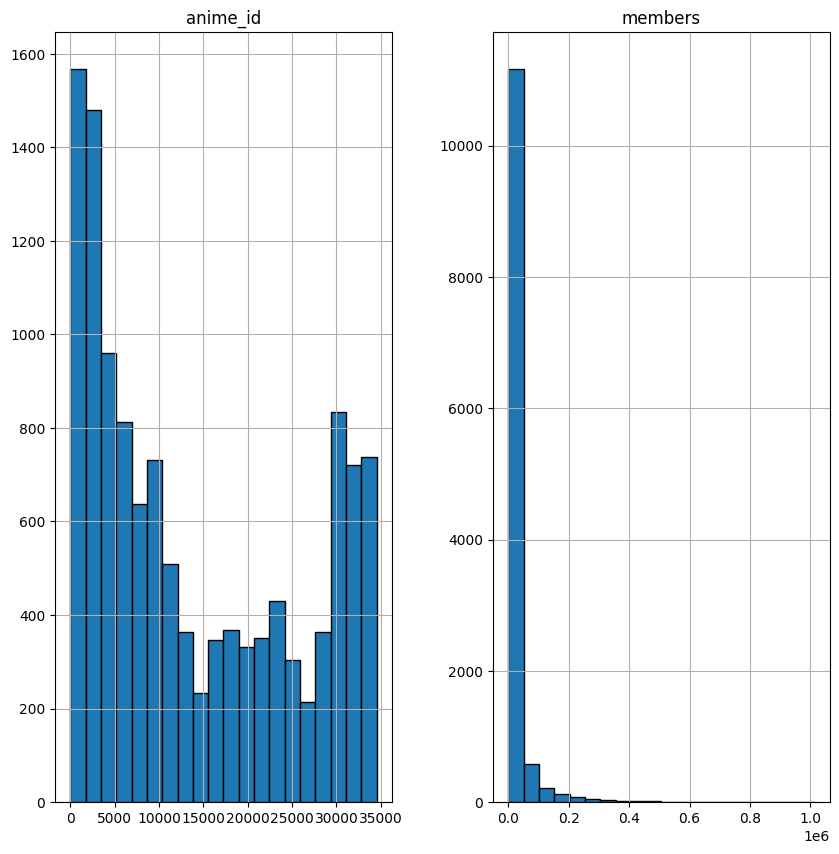

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric columns
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(10, 10), bins=20, edgecolor='black')
plt.show()


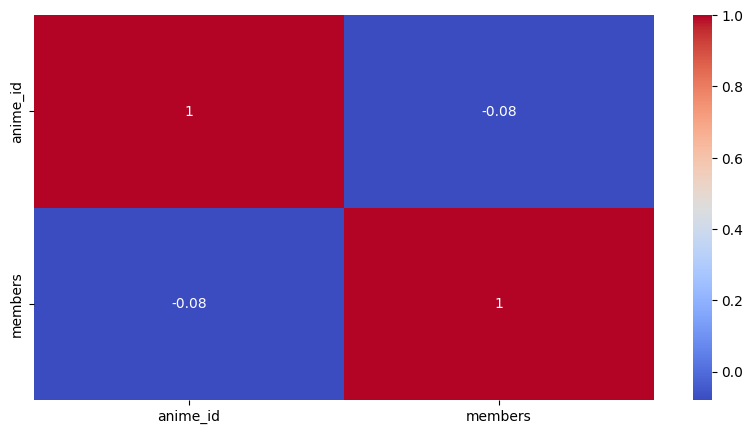

In [10]:
# Plot heatmap of correlations between numeric columns
plt.figure(figsize=(10, 5))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.show()


**Feature Extraction**

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
if 'genres' in df.columns:
    df['genres'] = df['genres'].str.split(', ')
    mlb = MultiLabelBinarizer()
    genres_encoded = mlb.fit_transform(df['genres'])
    genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=df.index)
    df = pd.concat([df, genres_df], axis=1).drop('genres', axis=1)


if 'user_ratings' in df.columns:
    scaler = StandardScaler()
    df['user_ratings'] = scaler.fit_transform(df[['user_ratings']])


print(df.head())
print(df.info())

   anime_id                              name episodes  members
0     32281                    Kimi no Na wa.        1   200630
1      5114  Fullmetal Alchemist: Brotherhood       64   793665
2     28977                          Gintama°       51   114262
3      9253                       Steins;Gate       24   673572
4      9969                     Gintama&#039;       51   151266
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  12294 non-null  int64 
 1   name      12294 non-null  object
 2   episodes  12294 non-null  object
 3   members   12294 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 384.3+ KB
None


**Recommendation System**

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Compute similarity matrix
similarity_matrix = cosine_similarity(numeric_df)

# Function to recommend anime based on cosine similarity
def recommend_anime(target_anime, df, similarity_matrix, threshold=0.5):
    if target_anime not in df['name'].values:
        return f"Anime '{target_anime}' not found in the dataset."

    # Get the index of the target anime
    target_index = df[df['name'] == target_anime].index[0]

    # Get the similarity scores for the target anime
    similarity_scores = list(enumerate(similarity_matrix[target_index]))

    # Sort the anime based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Filter based on the threshold and remove the target anime itself
    similar_anime_indices = [i for i, score in similarity_scores if score >= threshold and i != target_index]

    # Get the names of the similar anime
    similar_anime = df.iloc[similar_anime_indices]['name'].values

    return similar_anime
target_anime = "Naruto"  # Replace with a valid anime name from your dataset
recommended_anime = recommend_anime(target_anime, df, similarity_matrix, threshold=0.5)
print(f"Anime similar to '{target_anime}':")
print(recommended_anime)


Anime similar to 'Naruto':
['Cowboy Bebop: Tengoku no Tobira' 'Trigun' 'One Piece' ... 'The Samurai'
 'Pokemon: Pikachu no Kirakira Daisousaku!' 'The Rapeman']


**Evaluation**

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

def evaluate_recommendations(test_df, train_df, similarity_matrix, threshold=0.5):
    y_true = []
    y_pred = []

    for target_anime in test_df['name']:
        recommended_anime = recommend_anime(target_anime, train_df, similarity_matrix, threshold)

        if len(recommended_anime) > 0:
            true_anime_set = set(test_df[test_df['name'] == target_anime]['name'].values)
            recommended_anime_set = set(recommended_anime)

            y_true.append(1)
            y_pred.append(1 if len(true_anime_set.intersection(recommended_anime_set)) > 0 else 0)
        else:
            y_true.append(0)
            y_pred.append(0)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return precision, recall, f1

# Evaluate the recommendation system
precision, recall, f1 = evaluate_recommendations(test_df, train_df, similarity_matrix, threshold=0.5)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 1.00
Recall: 0.00
F1 Score: 0.00


Analyze the obtained precision, recall, and F1-score values to understand the performance.

Considerations for Improvement:

Tuning the Threshold: Experiment with different threshold values to see how they impact the metrics.

Feature Engineering: Add or modify features to better capture the similarities between anime.

Advanced Models: Explore more sophisticated recommendation algorithms such as collaborative filtering, matrix factorization, or deep learning approaches.